<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%97%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_PLZL_%D0%BE%D1%82_%D0%B0%D0%BA%D1%86%D0%B8%D0%B9_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B4%D0%BE%D0%B1%D1%8B%D0%B2%D0%B0%D1%8E%D1%89%D0%B8%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultra PRO задание
Найдите любую базу, подходящую для регрессии:
1. Спарсите данные
2. Разделите данные на обучающую и проверочную выборки
3. Напишите сеть для регрессии
4. Сделайте визуализацию результата
5. Напишите ваши результаты и выводы
-----
**Задача:** определить, насколько велика зависимость котировок акций Полюс Золота (PLZL) от котировок различных мировых золотодобывающих компаний и цен на золото и серебро

In [4]:
#!pip install yfinance
#import yfinance as yf ## Библиотека для получения данных об акциях
# fetch data by interval (including intraday if period < 60 days)
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/Занятие_6_Регрессия/data')

## Подготова данных для периода в 1D

In [ ]:
## Загрузка и сохранение первичных данных
#tickers = ['AU', 'GLD', 'GOLD', 'KGC', 'NEM', 'PLZL.ME', 'POLY.ME', 'SIBN.ME', 'ROSN.ME', 'YNDX']
#stock = yf.download(tickers,start='2017-01-01', end = '2020-12-31', interval = '1d')
#stock

# Newmont Goldcorp - 'NEM' - США
# Barrick Gold - 'GOLD' - Канада
# AngloGold Ashant -'AU' - ЮАР
# Kinross Gold - 'KGC' - Канада
# Newcrest Mining - 'NCM' - Австралия
# Polus Zoloto - 'PLZL.ME' - Россия
# Polimetal - POLY.ME - Россия
# 'GLD' и 'SILV' - цены на золото и серебро

[*********************100%***********************]  10 of 10 completed


Adj Close                         ...     Volume                      
                   AU         GLD       GOLD  ...    ROSN.ME    SIBN.ME       YNDX
Date                                          ...                                 
2017-01-03  10.798626  110.470001  15.677457  ...  5896382.0   177149.0  1597100.0
2017-01-04  10.954421  110.860001  15.687017  ...  4162160.0   445174.0  2445500.0
2017-01-05  11.674978  112.580002  16.614855  ...  4827289.0   522752.0  3997600.0
2017-01-06  11.090743  111.750000  16.193977  ...  3659820.0   192792.0  1691500.0
2017-01-09  11.032318  112.669998  16.232239  ...  4479020.0   122502.0  1614800.0
...               ...         ...        ...  ...        ...        ...        ...
2020-09-07        NaN         NaN        NaN  ...  3331330.0   593475.0        NaN
2020-09-08  27.900000  181.289993  29.200001  ...  4925890.0  2041703.0  6394200.0
2020-09-09  29.379999  183.050003  30.459999  ...  4488410.0   885274.0  2786800.0
2020-09-10  29.160000  182.460007  30.110001  ...  4093404.0   713831.0  2763500.0
2020-09-11        NaN         NaN        NaN  ...   226030.0    21510.0        NaN

[961 rows x 60 columns]

In [ ]:
#stock.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-09-04', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='Date', length=961, freq=None)

нужно бы перевести все в одну валюту для графиков

In [4]:
df = pd.read_csv('dailyClose.csv', index_col='Date')
df = df[700:]  # Убрал старые года, когда быладругая плавающая корреляция
df.fillna(method='ffill', inplace=True) # Убираем NaN
df.head()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
Date,,,,,,,,,,
2019-09-12,19.465727,141.320007,16.874512,4.73,38.104473,7242.666016,939.250427,379.118530,376.489624,37.740002
2019-09-13,18.720484,140.149994,16.973022,4.72,38.065048,7201.624512,915.172241,377.278381,374.184570,37.880001
2019-09-16,19.078201,141.320007,16.844963,4.92,37.927059,7374.000000,907.179504,395.357941,386.252136,38.029999
2019-09-17,19.624712,141.600006,17.751242,5.18,39.030964,7468.637695,917.670044,393.885834,382.365173,37.680000
2019-09-18,18.978836,140.710007,17.376907,5.02,38.488869,7517.404785,924.164185,391.953644,378.839844,37.330002


In [5]:
dailyChange = df.pct_change() # Рассчитали дневную доходность
dailyChange.fillna(0, inplace=True) # Заменили NA значения на 0
dailyChange.head()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
Date,,,,,,,,,,
2019-09-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-13,-0.038285,-0.008279,0.005838,-0.002114,-0.001035,-0.005667,-0.025636,-0.004854,-0.006122,0.003710
2019-09-16,0.019108,0.008348,-0.007545,0.042373,-0.003625,0.023936,-0.008734,0.047921,0.032250,0.003960
2019-09-17,0.028646,0.001981,0.053801,0.052845,0.029106,0.012834,0.011564,-0.003723,-0.010063,-0.009203
2019-09-18,-0.032911,-0.006285,-0.021088,-0.030888,-0.013889,0.006530,0.007077,-0.004905,-0.009220,-0.009289


### Статистика ЦЕН ЗАКРЫТИЯ


количество значений, среднее значение, стандартное отклонение, минимум, максимум, и даже 25-й, 50-й и 75-й процентиль для обеих серий

-----
В будущем необходимо изучить корреляцию плавающих средних этих значение. Возможно, придется поэкспериментировать с шагом

(261, 10)


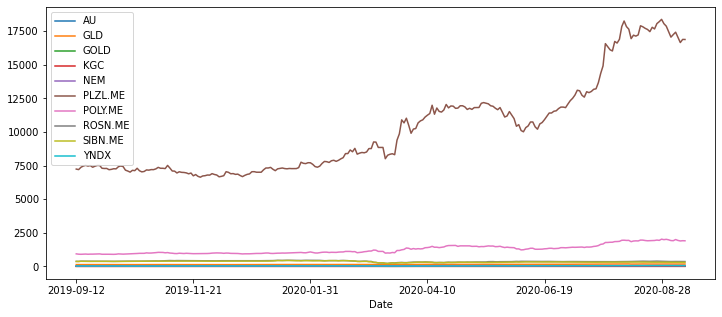

In [30]:
print(df.shape)
# обращаю внимание что часть цен дается в USD, а на российские компании - в рублях
df.plot(figsize=(12, 5))

In [31]:
df.describe()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.175323,155.516858,21.677306,5.919847,50.511285,10180.049878,1264.355455,382.772171,355.503024,43.327471
std,4.726308,15.123747,4.741775,1.606564,11.047197,3473.278857,328.803588,49.310794,48.616770,9.302159
min,14.050000,137.009995,15.580409,3.470000,36.083931,6638.515625,903.382874,223.436966,226.566513,28.910000
25%,19.545219,141.639999,17.421473,4.650000,40.030777,7278.835938,988.405945,359.504364,317.500000,36.000000
50%,21.383484,152.649994,19.736511,5.180000,46.769947,8766.175781,1122.151001,383.805511,337.489685,41.320000
75%,26.600000,163.570007,26.328604,7.020000,61.847424,11850.369141,1453.106812,429.400024,397.246613,48.049999
max,37.910000,193.889999,30.459999,9.870000,70.102516,18372.000000,2031.390259,464.204620,443.692749,68.230003


### Статистика ИЗМЕННЕНИЯ ЦЕН


Вычислим количество значений, среднее значение, стандартное отклонение, минимум, максимум, и даже 25-й, 50-й и 75-й процентиль для обеих серий

-----
В будущем необходимо изучить корреляцию плавающих средних этих значение. Возможно, придется поэкспериментировать с шагом

In [32]:
dailyChange.describe()

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.002536,0.001043,0.002648,0.003273,0.002499,0.003527,0.003030,0.000209,-0.000545,0.002276
std,0.044713,0.011285,0.029401,0.041212,0.027166,0.023917,0.024889,0.025295,0.021947,0.029375
min,-0.205929,-0.053694,-0.103331,-0.153846,-0.111161,-0.094649,-0.113535,-0.169106,-0.136115,-0.156637
25%,-0.019646,-0.004309,-0.011490,-0.013986,-0.008107,-0.008534,-0.006274,-0.006806,-0.007232,-0.009203
50%,0.000000,0.001755,0.001114,0.000000,0.001708,0.000700,0.002444,0.000000,0.000000,0.003401
75%,0.024845,0.006212,0.017211,0.023866,0.012801,0.013896,0.013195,0.008373,0.005733,0.015771
max,0.232181,0.048530,0.151802,0.190000,0.140182,0.130298,0.161561,0.129915,0.120833,0.119586


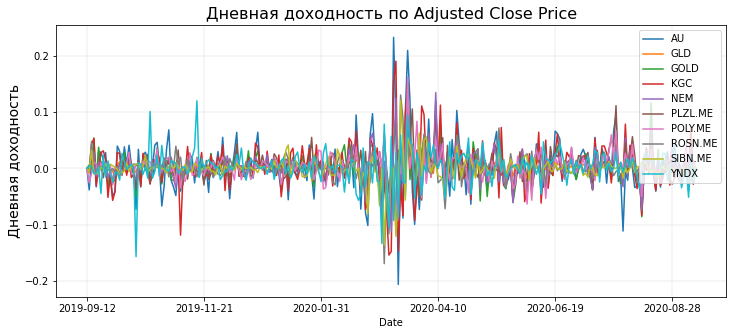

In [33]:
# График дневных доходностей золотодобывающих компаний
dailyChange.plot(figsize=(12, 5))
plt.legend()
plt.title("Дневная доходность по Adjusted Close Price", fontsize=16)
plt.ylabel('Дневная доходность', fontsize=14)
plt.grid(linewidth=0.2) # Plot the grid lines
plt.show()

### Вычислим КУМУЛЯТИВНУЮ доходность

Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени

---
Что было бы, если вложить 1USD  в акцию а начале периода?

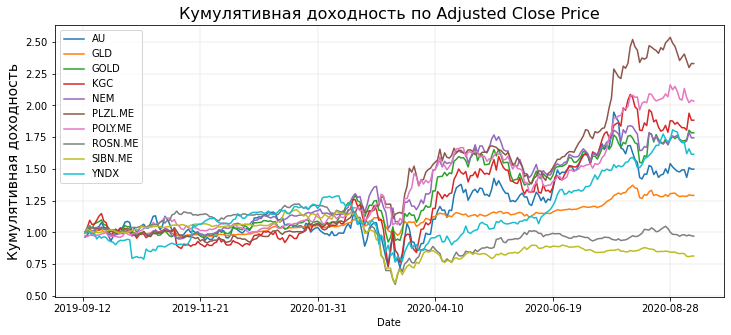

In [34]:
# График Кумулятивной доходности
((df.pct_change()+1).cumprod()).plot(figsize=(12, 5))

plt.legend()
plt.title("Кумулятивная доходность по Adjusted Close Price", fontsize=16)
plt.ylabel('Кумулятивная доходность', fontsize=14)
plt.grid(linewidth=0.2)
plt.show()

## Решение задачи регрессии с помощью Нейросетей

In [8]:
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop, Adamax, Nadam
from keras.layers import concatenate, Input, Dense, BatchNormalization, Dropout, Flatten
from keras.layers import LSTM, Conv1D, GRU, MaxPooling1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

from keras.utils import plot_model

### Готовлю данные

In [9]:
Y = dailyChange['PLZL.ME'] # динамика изменения цен
tickets = ['GLD', 'POLY.ME']
X = dailyChange.iloc[:len(Y)][tickets]

Y = Y.values # переводим в numpy.ndarray
X = X.values # переводим в numpy.ndarray

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1, shuffle=False)
print('xTest: ', xTest.shape, '\tyTest: ', yTest.shape)
print( 'xTrain: ', xTrain.shape, '\tyTrain: ', yTrain.shape)

xTest:  (27, 2) 	yTest:  (27,)
xTrain:  (234, 2) 	yTrain:  (234,)


In [14]:
### Коллбэк по минимизации отклонения предсказания цены в рублях
def on_epoch_end(epoch, logs):
  yPred = model.predict([xTest])

  absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
  #print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)\n')

  yTestCum = (yTest+1).cumprod()
  yPredCum = (yPred+1).cumprod()
  delta = yTestCum[len(yPred)-1] - yPredCum[len(yPred)-1]
  print("Эпоха:", epoch,
        '  Corr:', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()),
        '  Накопленное отклонение: ', round(abs(delta), 3), 
        '  Среднее отклонение: ', round(absDelta, 3),
        '  ', round((abs(abs(delta) + absDelta))/2, 3), ) #Выводим сообщения

# Коллбэки
pltMae = LambdaCallback(on_epoch_end=on_epoch_end)

### Concatenate

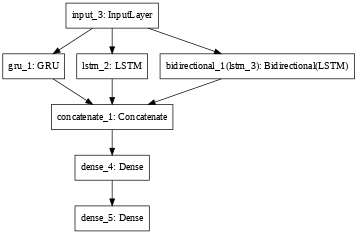

In [43]:
input1 = Input(shape=(len(tickets), 1))
input2 = Input(shape=(len(tickets), ))

x1 = GRU(20)(input1)
#x1 = Dense(10, activation='relu')(x1)

x2 = LSTM(20)(input1)
#x2 = Dense(10, activation='relu')(x2)

x4 = Bidirectional(LSTM(20))(input1)

x3 = Dense(1000, activation='relu')(input2)
#x3 = Dense(10, activation='relu')(x3)

#x = concatenate([x1, x2, x3])
x = concatenate([x1, x2, x4])
x = Dense(100, activation='relu')(x)
x = Dense(1, activation='linear')(x)

#model = Model((input1, input2), x)
model = Model(input1, x)
plot_model(model, dpi=50)

In [18]:
#model = load_model('PLZL_Concatenate.h5')

In [44]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_Concatenate.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=100, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])

Эпоха: 0   Corr: [28.80476342]   Накопленное отклонение:  0.227   Среднее отклонение:  0.164    0.196
Эпоха: 1   Corr: [25.2272519]   Накопленное отклонение:  0.037   Среднее отклонение:  0.091    0.064
Эпоха: 2   Corr: [29.84383269]   Накопленное отклонение:  0.308   Среднее отклонение:  0.233    0.271
Эпоха: 3   Corr: [27.3147475]   Накопленное отклонение:  0.116   Среднее отклонение:  0.065    0.09
Эпоха: 4   Corr: [22.97568005]   Накопленное отклонение:  0.193   Среднее отклонение:  0.277    0.235
Эпоха: 5   Corr: [24.8156181]   Накопленное отклонение:  0.066   Среднее отклонение:  0.123    0.094

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Эпоха: 6   Corr: [24.46081008]   Накопленное отклонение:  0.091   Среднее отклонение:  0.151    0.121
Эпоха: 7   Corr: [26.67204425]   Накопленное отклонение:  0.067   Среднее отклонение:  0.019    0.043
Эпоха: 8   Corr: [26.65813791]   Накопленное отклонение:  0.067   Среднее отклонение:  0.018    0.042
Эпох

In [45]:
# prediction
yPred = model.predict([xTest], verbose=1)
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)')
print('Корреляция yTest и yPred накопленных: ', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()), '\n')

1/1 [==============================] - 0s 2ms/step

Средний модуль ошибки 0.013 условных единиц ;)
Корреляция yTest и yPred накопленных:  [26.57662445] 



In [26]:
#model.save('PLZL_Concatenate.h5') 

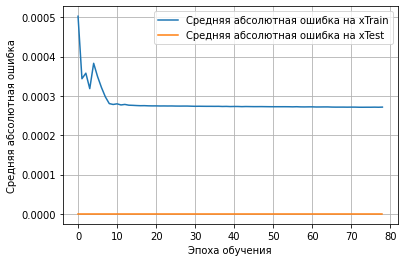

28 18250.12109375


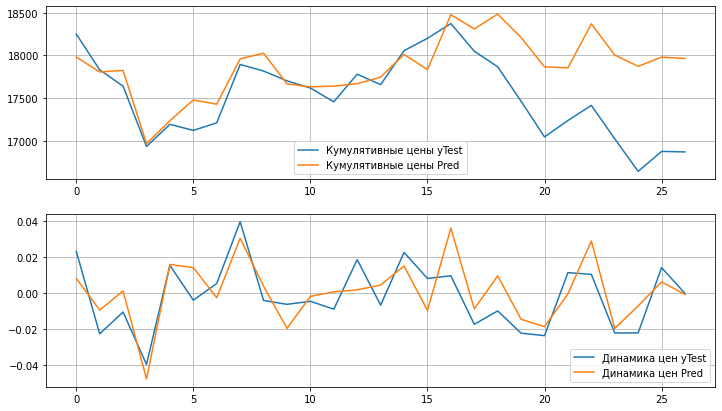

In [46]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

#Выводим график ЦЕН PLZL
yPrice = df['PLZL.ME'][(len(yTrain)-1):]
print(len(yPrice), yPrice[1])
yPrice.plot(figsize=(12, 3))

ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot(yPrice[0]*(yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot(yPrice[0]*(yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()

#Выводим график ежедневной динамики цен
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

### Bidirectional LSTM

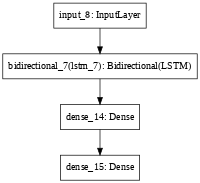

In [34]:
input1 = Input(shape=(len(tickets), 1))
x = Bidirectional(LSTM(20))(input1)
x = Dense(1000, activation='relu')(x)
x = Dense(1, activation='linear')(x)

model = Model(input1, x)
plot_model(model, dpi=50)

In [35]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_Bidirectional.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=100, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])

Эпоха: 0   Corr: [31.92108685]   Накопленное отклонение:  0.477   Среднее отклонение:  0.358    0.417
Эпоха: 1   Corr: [27.37883138]   Накопленное отклонение:  0.123   Среднее отклонение:  0.071    0.097
Эпоха: 2   Corr: [30.94159287]   Накопленное отклонение:  0.4   Среднее отклонение:  0.303    0.352
Эпоха: 3   Corr: [35.42715928]   Накопленное отклонение:  0.775   Среднее отклонение:  0.553    0.664
Эпоха: 4   Corr: [20.40665942]   Накопленное отклонение:  0.353   Среднее отклонение:  0.513    0.433
Эпоха: 5   Corr: [22.98330169]   Накопленное отклонение:  0.188   Среднее отклонение:  0.27    0.229

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Эпоха: 6   Corr: [24.01998529]   Накопленное отклонение:  0.117   Среднее отклонение:  0.182    0.15
Эпоха: 7   Corr: [26.80634653]   Накопленное отклонение:  0.082   Среднее отклонение:  0.033    0.058
Эпоха: 8   Corr: [26.89000222]   Накопленное отклонение:  0.088   Среднее отклонение:  0.04    0.064
Эпоха

In [36]:
# prediction
yPred = model.predict([xTest], verbose=1)
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)')
#print('Считаем корреляции тестовых данных без нейросети:')
#print('Корреляция PLZL и POLY: ', np.correlate(dailyChange['PLZL.ME'][len(xTrain):], dailyChange['POLY.ME'][len(xTrain):]))
#print('Корреляция PLZL и GLD: ', np.correlate(dailyChange['PLZL.ME'][len(xTrain):], dailyChange['GLD'][len(xTrain):]))
print('Корреляция yTest и yPred накопленных: ', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()), '\n')
#print('Корреляция yTest и yPred накопленных: ', np.correlate(yTest, yPred)

1/1 [==============================] - 0s 4ms/step

Средний модуль ошибки 0.011 условных единиц ;)
Корреляция yTest и yPred накопленных:  [26.48423223] 



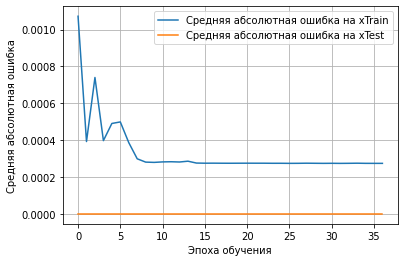

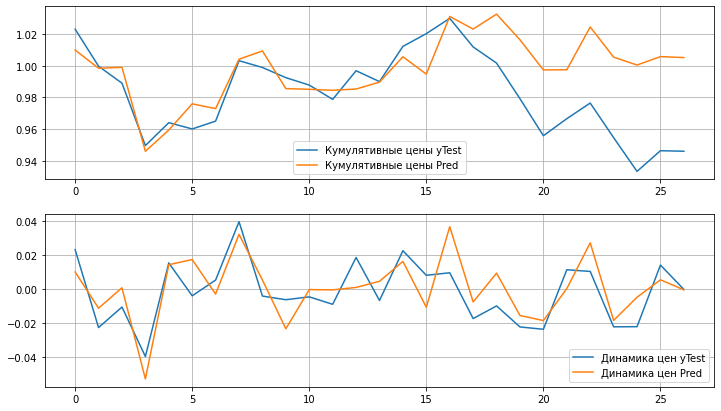

In [37]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

#Выводим график НАКОПЛЕННЫХ изменнений цен
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot((yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot((yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()
#Выводим график ежедневной динамики цен
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

In [38]:
#model.save('PLZL_Bidirectional.h5') 
#model = load_model('PLZL_Bidirectional.h5')

### Сеть GRU

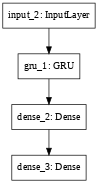

In [16]:
# GRU
input = Input(shape=(len(tickets), 1))
x = GRU(20)(input)
x = Dense(100, activation='relu')(x)
x = Dense(1, activation='linear')(x)
model = Model(input, x)

plot_model(model, dpi=50)

In [22]:
#model.save('PLZL_GRU.h5') 
#model = load_model('PLZL_GRU.h5')

In [17]:
model.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_GRU.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=100, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])


Эпоха: 0   Corr: [26.97996352]   Накопленное отклонение:  0.085   Среднее отклонение:  0.034    0.059
Эпоха: 1   Corr: [24.14710559]   Накопленное отклонение:  0.116   Среднее отклонение:  0.182    0.149
Эпоха: 2   Corr: [27.26975923]   Накопленное отклонение:  0.11   Среднее отклонение:  0.058    0.084
Эпоха: 3   Corr: [25.85710013]   Накопленное отклонение:  0.006   Среднее отклонение:  0.045    0.025
Эпоха: 4   Corr: [24.87878814]   Накопленное отклонение:  0.064   Среднее отклонение:  0.12    0.092
Эпоха: 5   Corr: [29.45140673]   Накопленное отклонение:  0.276   Среднее отклонение:  0.206    0.241
Эпоха: 6   Corr: [28.82882202]   Накопленное отклонение:  0.228   Среднее отклонение:  0.166    0.197

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Эпоха: 7   Corr: [25.40959017]   Накопленное отклонение:  0.026   Среднее отклонение:  0.077    0.052
Эпоха: 8   Corr: [26.61283853]   Накопленное отклонение:  0.061   Среднее отклонение:  0.013    0.037
Эп

In [21]:
# prediction
yPred = model.predict([xTest], verbose=1)
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)')
print('Корреляция yTest и yPred накопленных: ', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()), '\n')

1/1 [==============================] - 0s 1ms/step

Средний модуль ошибки 0.019 условных единиц ;)
Корреляция yTest и yPred накопленных:  [26.68719692] 



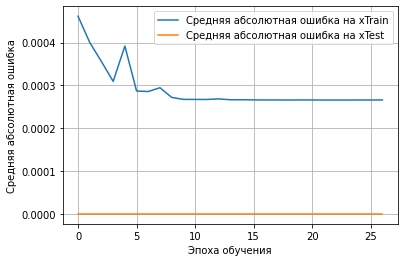

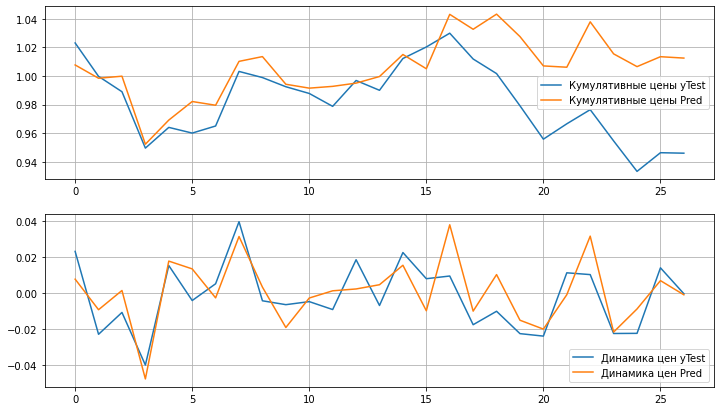

In [19]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

#Выводим график НАКОПЛЕННЫХ изменнений цен
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot((yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot((yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()
#Выводим график ежедневной динамики цен
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

### Сеть LSTM

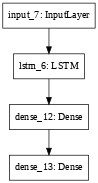

In [28]:
# LSTM
input = Input(shape=(len(tickets), 1))
#x = SpatialDropout1D(0.1)(x)
x = LSTM(20)(input)
x = Dense(200, activation='relu')(x)
x = Dense(1, activation='linear')(x)
model = Model(input, x)

plot_model(model, dpi=50)

In [ ]:
#model.save('PLZL_LSTM.h5') 
#model = load_model('PLZL_LSTM.h5')

In [31]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_LSTM.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=100, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])


Эпоха: 0   Corr: [26.55347748]   Накопленное отклонение:  0.059   Среднее отклонение:  0.007    0.033
Эпоха: 1   Corr: [22.3473184]   Накопленное отклонение:  0.233   Среднее отклонение:  0.333    0.283
Эпоха: 2   Corr: [32.12461412]   Накопленное отклонение:  0.493   Среднее отклонение:  0.37    0.431
Эпоха: 3   Corr: [35.64609833]   Накопленное отклонение:  0.79   Среднее отклонение:  0.561    0.675
Эпоха: 4   Corr: [23.41219169]   Накопленное отклонение:  0.161   Среднее отклонение:  0.237    0.199
Эпоха: 5   Corr: [23.86520719]   Накопленное отклонение:  0.13   Среднее отклонение:  0.198    0.164

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Эпоха: 6   Corr: [26.15890525]   Накопленное отклонение:  0.033   Среднее отклонение:  0.017    0.025
Эпоха: 7   Corr: [26.51705137]   Накопленное отклонение:  0.059   Среднее отклонение:  0.01    0.035
Эпоха: 8   Corr: [26.27361389]   Накопленное отклонение:  0.041   Среднее отклонение:  0.008    0.025
Эпоха

In [32]:
# prediction
yPred = model.predict([xTest], verbose=1)
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)')
print('Корреляция yTest и yPred накопленных: ', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()), '\n')

1/1 [==============================] - 0s 2ms/step

Средний модуль ошибки 0.027 условных единиц ;)
Корреляция yTest и yPred накопленных:  [26.73679996] 



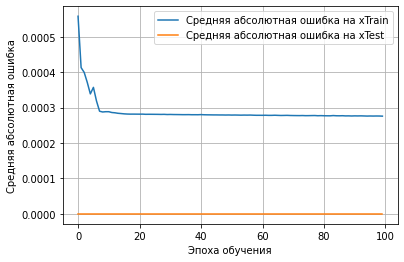

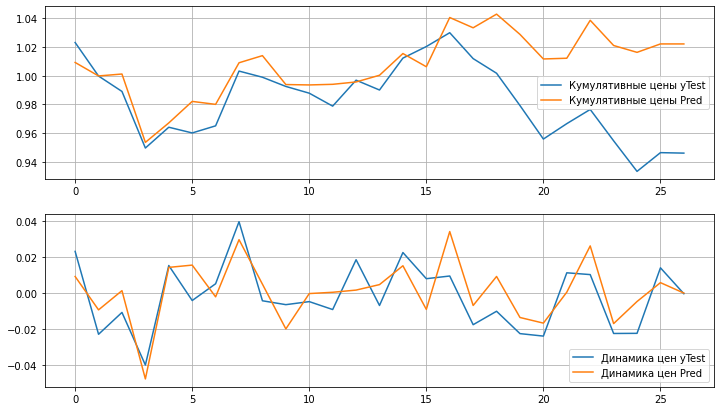

In [33]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

#Выводим график НАКОПЛЕННЫХ изменнений цен
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot((yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot((yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()
#Выводим график ежедневной динамики цен
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

### Простая сеть Dense

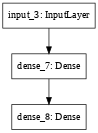

In [16]:
# define model

input = Input(shape=(len(tickets), ))
x = Dense(1000, activation='relu')(input)
#x = Dropout(0.4)(x)
#x = Dense(10000, activation='relu')(x)    #10000
#x = Dense(10000, activation='relu')(x)    #10000
#x = Dense(1000, activation='relu')(x)      #1000
x = Dense(1, activation='linear')(x)
model = Model(input, x)

plot_model(model, dpi=50)

In [23]:
#model.save('PLZL_Dense.h5') 
#model = load_model('PLZL_Dense.h5')

In [17]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'loss', patience = 10, verbose = 0, restore_best_weights = True)
#Checkpoint = ModelCheckpoint('PLZL_Dense___.h5', monitor = 'loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-05, verbose = 1)

# fit model
history = model.fit(xTrain, yTrain, epochs=200, verbose=0,
                    validation_data=([xTest, yTest]),
                    callbacks = [early_stopping, reduce_lr, pltMae])


Эпоха: 0   Corr: [29.13388844]   Накопленное отклонение:  0.235   Среднее отклонение:  0.17    0.202
Эпоха: 1   Corr: [27.08583947]   Накопленное отклонение:  0.077   Среднее отклонение:  0.026    0.052
Эпоха: 2   Corr: [26.47513428]   Накопленное отклонение:  0.03   Среднее отклонение:  0.019    0.025
Эпоха: 3   Corr: [28.36677406]   Накопленное отклонение:  0.169   Среднее отклонение:  0.114    0.141
Эпоха: 4   Corr: [26.10502826]   Накопленное отклонение:  0.004   Среднее отклонение:  0.046    0.025
Эпоха: 5   Corr: [27.0468693]   Накопленное отклонение:  0.072   Среднее отклонение:  0.024    0.048
Эпоха: 6   Corr: [27.3136424]   Накопленное отклонение:  0.093   Среднее отклонение:  0.044    0.068

Epoch 00008: ReduceLROnPlateau reducing learning rate to 1e-05.
Эпоха: 7   Corr: [27.20843754]   Накопленное отклонение:  0.086   Среднее отклонение:  0.037    0.062
Эпоха: 8   Corr: [27.20737916]   Накопленное отклонение:  0.086   Среднее отклонение:  0.037    0.062
Эпоха: 9   Corr: [27.

In [ ]:
# prediction
yPred = model.predict([xTest], verbose=1)
absDelta = float(abs(sum(yPred)-sum(yTest)/len(yTest))) #Берём модуль отклоненияsum(absDelta)/len(absDelta)
print('\nСредний модуль ошибки', round(absDelta, 3), 'условных единиц ;)')
print('Корреляция yTest и yPred накопленных: ', np.correlate((yTest+1).cumprod(), (yPred+1).cumprod()), '\n')

1/1 [==============================] - 0s 2ms/step

Средний модуль ошибки 0.02 условных единиц ;)
Корреляция yTest и yPred накопленных:  [26.85622982] 



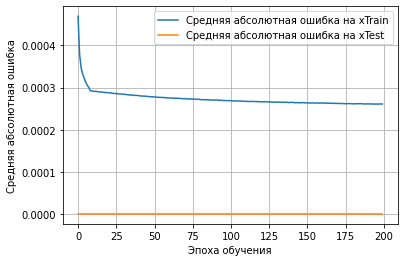

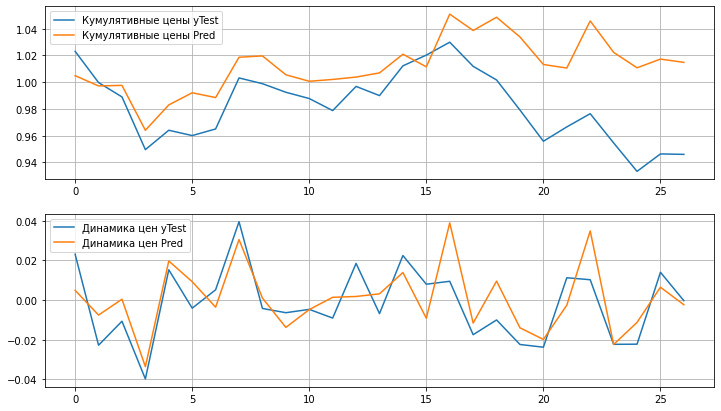

In [19]:
#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на xTrain')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на xTest')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.grid()
plt.show()

#Выводим графики ошибки
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # и ax2 - нижняя строка
ax1 = plt.plot((yTest+1).cumprod(), label='Кумулятивные цены yTest')
ax1 = plt.plot((yPred+1).cumprod(), label='Кумулятивные цены Pred')
plt.legend()
plt.grid()

ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))
ax2 = plt.plot(yTest, label='Динамика цен yTest')
ax2 = plt.plot(yPred, label='Динамика цен Pred')
plt.legend()
plt.grid()

plt.gcf().set_size_inches(12,7)

----
Качество регрессии я решил проверять не написанным коллбэком или mse, а сделал как бы игру: если кумулятивное приращение дневных приращений цен совпадет с реальным на конец периода, то все ок! Это говорит о найденной нейросетью высокой зависимостью дневных изменений цен Полюс Золота от дневных изменений цен на Полиметалл и Золото.

## Решение задачи регрессии с помощью Pandas

### Графики распределения изменений цен на акции выбранных компаний

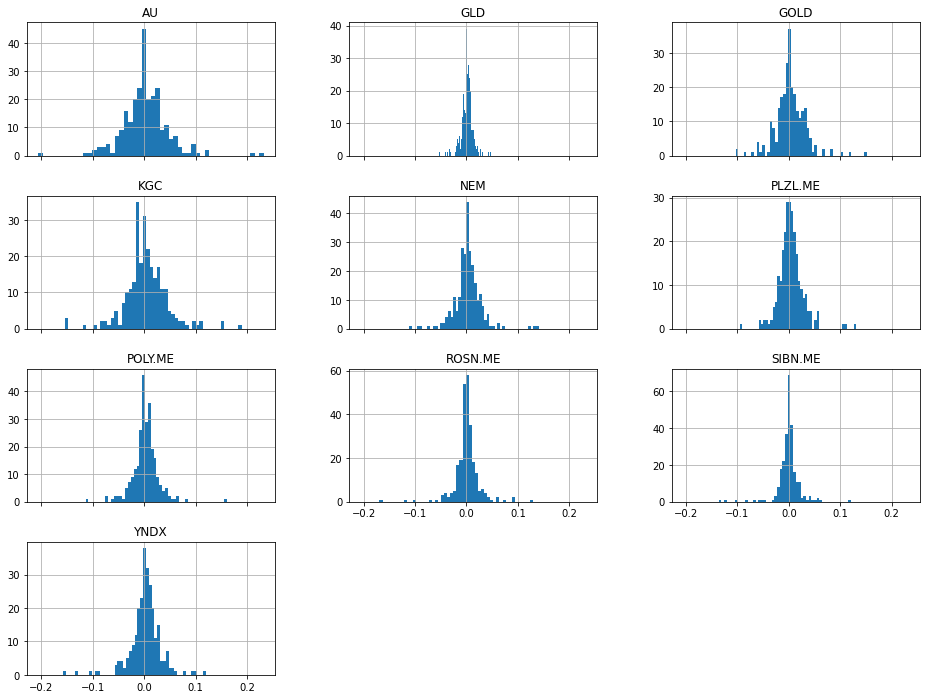

In [29]:
# Распределение
dailyChange.hist(bins=50, sharex=True, figsize=(16, 12))

plt.show()

Более узкие кривые говорят о меньшей волатильности акций, чем более широкие кривые, имеющие асимметрию, последнее указывает на наличие тренда в сторону увеличения доходности или убыточности. Все это позволяет быстро сравнить любые две акции.

Еще один полезный график —матрица рассеяния. Ее можно легко построить при помощи функции scatter_matrix (), входящей в библиотеку pandas. В качестве аргументов используется daily_pct_change и устанавливается параметр Ядерной оценки плотности — Kernel Density Estimation. Кроме того, можно установить прозрачность с помощью параметра alpha и размер графика с помощью параметра figsize.

### Вычисление волатильности акций


Волатильность акции – это показатель, характеризующий изменчивость цены акции за определенный период времени. Обычно сравнивают волатильность одной акции с волатильностью другой акции, чтобы определить, какая из них имеет меньший риск, или с индексом волатильности, чтобы сравнить волатильность акций с волатильностью рынка в целом.

Как правило, чем выше волатильность, тем рискованнее инвестиции в эту акции.

Волатильность рассчитывается на основе скользящего стандартного отклонения от процентного изменения акции (и масштабируется относительно размера окна). Ширина окна влияет на общий результат. Чем шире окно, тем менее репрезентативным будет измерение. Когда окно сужается, результат приближается к стандартному отклонению. Выбрать правильный размер окна, основываясь на частоте дискретизации данных, это в некотором смысле искусство

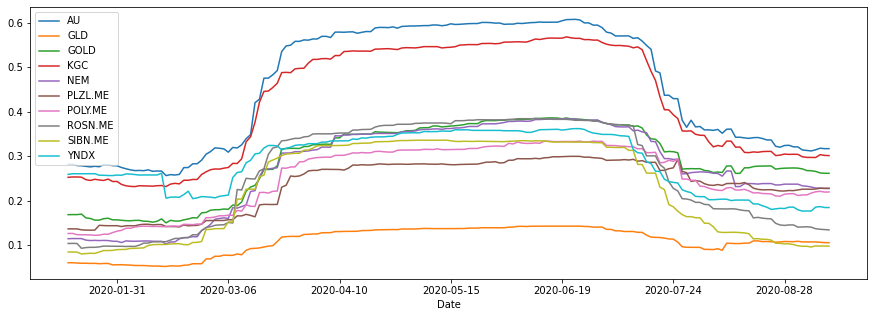

In [35]:
period = 90 # Определяю рассматриваемый период

# Вычисляю волатильность дневных доходностей
vol = dailyChange.rolling(period).std() * np.sqrt(period) 

# Строю график
vol.plot(figsize=(15, 5))
plt.show()

### Расчет корреляции между котировками с помощью Pandas

Чем выше корреляция, тем больше у нас возможностей спрогнозировать изменение одной переменной, основываясь на изменении другой переменной.

Точную корреляцию между столбцами данных в объекте DataFrame можно вычислить с помощью метода .corr(). В результате мы получим матрицу всех возможных корреляций между переменными, представленными столбцами.

In [6]:
# Используем дневные доходности акций
corrs = dailyChange.corr()
corrs

,AU,GLD,GOLD,KGC,NEM,PLZL.ME,POLY.ME,ROSN.ME,SIBN.ME,YNDX
AU,1.000000,0.629857,0.783623,0.803747,0.760213,0.331282,0.330196,0.165383,0.129869,0.203403
GLD,0.629857,1.000000,0.733380,0.660359,0.680771,0.402467,0.471217,0.174318,0.094147,0.079072
GOLD,0.783623,0.733380,1.000000,0.847209,0.877154,0.311667,0.365802,0.148542,0.054264,0.226757
KGC,0.803747,0.660359,0.847209,1.000000,0.832113,0.179079,0.196996,0.103111,0.020939,0.185984
NEM,0.760213,0.680771,0.877154,0.832113,1.000000,0.277862,0.325355,0.099817,0.009681,0.271980
PLZL.ME,0.331282,0.402467,0.311667,0.179079,0.277862,1.000000,0.753094,0.097254,0.119992,0.150928
POLY.ME,0.330196,0.471217,0.365802,0.196996,0.325355,0.753094,1.000000,0.180405,0.178096,0.112919
ROSN.ME,0.165383,0.174318,0.148542,0.103111,0.099817,0.097254,0.180405,1.000000,0.855125,0.235415
SIBN.ME,0.129869,0.094147,0.054264,0.020939,0.009681,0.119992,0.178096,0.855125,1.000000,0.220402
YNDX,0.203403,0.079072,0.226757,0.185984,0.271980,0.150928,0.112919,0.235415,0.220402,1.000000


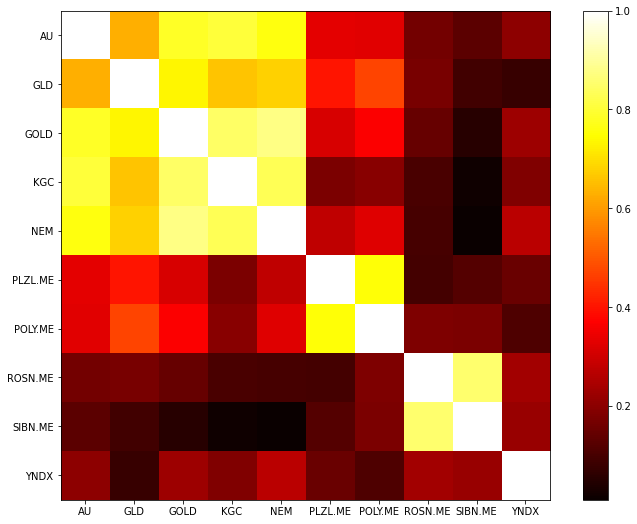

In [7]:
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none') 
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns) 
plt.yticks(range(len(corrs)), corrs.columns) 
plt.gcf().set_size_inches(12,9)

Интересно, что прослеживается крайне слабая корреляция росскийких PLZL и POLY с их иностранными "коллегами". Возможно это связано с тем, то их интеграция в мировые финансы только начинается?

Также заметно, что роль строимости серебра в стоимости акций существенно ниже, чем золота

### Линейная регрессия

инейная регрессия используется в качестве прогнозирующей модели, когда предполагается линейная зависимость между зависимой переменной (переменная, которую мы пытаемся предсказать) и независимой переменной (переменная и/или переменные, используемые для предсказания).

В действительности так же может существовать связь между зависимой переменной и несколькими независимыми переменными. Для этих типов моделей (при условии линейности) мы можем использовать множественную линейную регрессию следующего вида

Бета — коэффициент. 
Если не вдаваться в подробности, то можно его охарактеризовать следующим образом:

Акции c бета-коэффициентом:
- 0 указывает на отсутствие корреляции между акцией и индексом
- 1 указывает на то, что акция имеет ту же волатильность, что и индекс
- больше одного — указывает на большую доходность (а следовательно и риски) акции, чем индекс
- менее единицы — менее волатильная акция, чем индекса

Другими словами, если акция увеличится на 14%, в то время как рынок вырос всего на 10%, то бета-коэффициент акции составит 1,4. Как правило на рынках с более высоким бета-коэффициентом можно предположить лучшие условия для вознаграждения (а следовательно и для риска)

https://habrastorage.org/webt/-e/yf/ky/-eyfkygh_enn9wusk29gg2gyot8.png![image.png](attachment:image.png)


In [8]:
import statsmodels.api as sm

# Создание модели взаимосвязей между PLZL и POLY
model = sm.OLS(dailyChange['PLZL.ME'], dailyChange['POLY.ME']).fit()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                PLZL.ME   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              349.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):                    5.23e-50
Time:                        21:25:07   Log-Likelihood:                          712.87
No. Observations:                 261   AIC:                                     -1424.
Df Residuals:                     260   BIC:                                     -1420.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
# То же самое, но с помощью другой библиотеки
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(dailyChange['PLZL.ME'], dailyChange['POLY.ME'])

print(slope, intercept, r_value, p_value, std_err)

0.7837122541685413 0.00026583458961346824 0.7530939003134187 5.277183420492453e-49 0.04254280530928793


### Плавающая корреляция курсов акций и цен на Золото

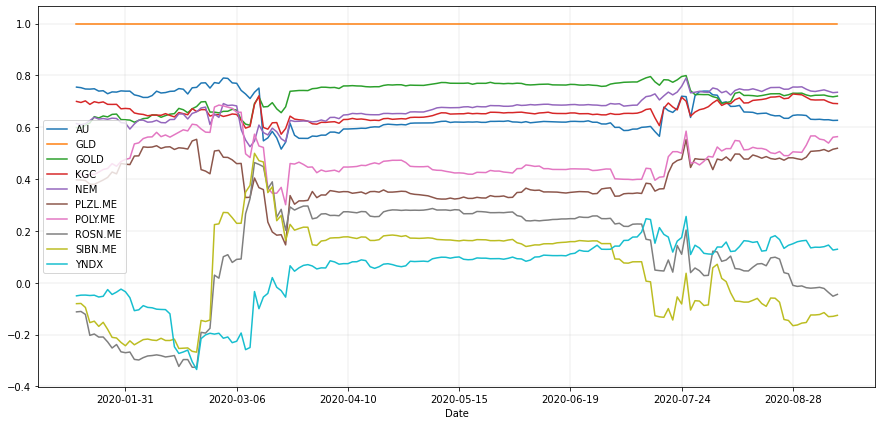

In [10]:
# Считаю rolling correlation от цены на Золото

period = 90
rollCorr = dailyChange.rolling(window=period).corr(dailyChange['GLD'])

# Строю график
rollCorr.plot(figsize=(15, 7))
plt.grid(linewidth=0.2)
plt.show()

Корреляция ДНЕВНЫХ ДОХОДНОСТЕЙ с ценами на Золото усиливается

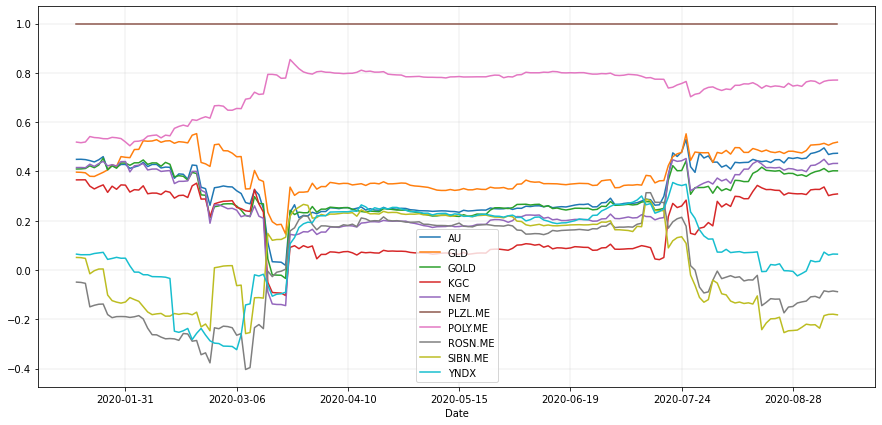

In [6]:
# Считаю rolling correlation от цены на PLZL

period = 90
rollCorr = dailyChange.rolling(window=period).corr(dailyChange['PLZL.ME'])

# Строю график
rollCorr.plot(figsize=(15, 7))
plt.grid(linewidth=0.2)
plt.show()

Растет связь с ценой Полиметалла. А вот с нефтью или it связи практически никакой, а временами - слабая обратная.

## Примеры дополнительных данных, которые можно применить в анализе

Technical Analysis Library in Python https://github.com/bukosabino/ta?source=post_page-----4b2b390d3543----------------------

https://ta-lib.org

http://mrjbq7.github.io/ta-lib/

A Simple Trading Strategy https://www.datacamp.com/community/tutorials/finance-python-trading#gs.8u7rQvs

### Дополнительная статистика из Yahoo Finance

In [ ]:
LMT = yf.Ticker("LMT") # Lockheed Martin
LMT.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1977-01-03,0.34,0.35,0.34,0.35,165200.0,0.0,0.0
1977-01-04,0.35,0.35,0.33,0.35,179800.0,0.0,0.0
1977-01-05,0.35,0.36,0.35,0.36,189600.0,0.0,0.0
1977-01-06,0.36,0.38,0.36,0.38,384200.0,0.0,0.0
1977-01-07,0.38,0.38,0.37,0.38,345200.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-03,399.50,401.88,383.38,386.29,1500800.0,0.0,0.0
2020-09-04,388.51,391.55,379.58,385.02,933600.0,0.0,0.0
2020-09-08,383.99,385.29,378.36,380.23,1071600.0,0.0,0.0


In [ ]:
LMT.sustainability

,Value
2020-8,
palmOil,False
controversialWeapons,True
gambling,False
socialScore,16.09
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
LMT.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,State Street Corporation,42435377,2020-06-29,0.1518,15485517774
1,"Vanguard Group, Inc. (The)",22246588,2020-06-29,0.0796,8118224892
2,Blackrock Inc.,16985580,2020-06-29,0.0608,6198377853
3,Capital World Investors,16595630,2020-06-29,0.0594,6056077299
4,"Wellington Management Company, LLP",10758413,2020-06-29,0.0385,3925960071
5,Bank of America Corporation,9017771,2020-06-29,0.0323,3290764993
6,"Geode Capital Management, LLC",4094244,2020-06-29,0.0146,1494071520
7,"Ameriprise Financial, Inc.",3371326,2020-06-29,0.0121,1230264283
8,"FMR, LLC",3368655,2020-06-29,0.0121,1229289582
9,Northern Trust Corporation,3167070,2020-06-29,0.0113,1155727184


In [ ]:
LMT.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,80.38%,% of Shares Held by Institutions
2,80.44%,% of Float Held by Institutions
3,2142,Number of Institutions Holding Shares


In [ ]:
LMT.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2011-12-30 02:00:00,Guggenheim,Sell,,down
2012-04-11 06:24:00,Deutsche Bank,Hold,,main
2012-04-27 07:13:00,Credit Suisse,Neutral,,main
2012-04-27 08:33:00,JP Morgan,Neutral,,main
2012-07-17 07:16:00,Citigroup,Buy,,main
...,...,...,...,...
2020-03-25 15:03:44,Morgan Stanley,Equal-Weight,,main
2020-04-14 14:41:13,Morgan Stanley,Equal-Weight,,main
2020-04-22 12:20:34,Credit Suisse,Neutral,,main
